# Exploration and pre-processing

### actually missing:
 - denormalization ic50

### to check
 - number of genes per cell line 

In [1]:
#import libraries
import pandas as pd

In [2]:
#import data
df = pd.read_pickle('data/gdsc2.pkl')

In [3]:
df.head()

ID1      ID2                                                 X1  \
0  Camptothecin  HCC1954  CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...   
1  Camptothecin  HCC1143  CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...   
2  Camptothecin  HCC1187  CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...   
3  Camptothecin  HCC1395  CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...   
4  Camptothecin  HCC1599  CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...   

                                                  X2         Y  
0  [8.54820830373167, 2.5996072676336297, 10.3759... -0.251083  
1  [7.58193774904993, 2.81430257671695, 10.363326...  1.343315  
2  [9.013252540641961, 2.9520929896608, 9.3474286...  1.736985  
3  [7.4351511634642105, 2.8325700611437004, 10.34... -2.309078  
4  [8.334239608034789, 2.7477031637484997, 10.314... -3.106684

In [4]:
len(df['X2'][4])

17737

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92703 entries, 0 to 92702
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID1     92703 non-null  object 
 1   ID2     92703 non-null  object 
 2   X1      92703 non-null  object 
 3   X2      92703 non-null  object 
 4   Y       92703 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.5+ MB


In [6]:
# number of drugs
df['ID1'].nunique()

137

In [7]:
#Â number of cell lines
df['ID2'].nunique()

805

In [8]:
# number of genes per cell line
df_2 = df.copy()
df_2['num_genes'] = df['X2'].apply(len)

# Average number of genes in X2 for each cell line
avg_genes_per_cell_line = df_2.groupby('ID2')['num_genes'].mean()
print(avg_genes_per_cell_line)

ID2
22RV1       17737.0
23132-87    17737.0
42-MG-BA    17737.0
5637        17737.0
639-V       17737.0
             ...   
YAPC        17737.0
YH-13       17737.0
YT          17737.0
ZR-75-30    17737.0
huH-1       17737.0
Name: num_genes, Length: 805, dtype: float64


In [9]:
# number of combinations of drugs and cell lines 
num_combinations = df[['ID1', 'ID2']].drop_duplicates().shape[0]
print(num_combinations)

92029


In [10]:
# IC50 mean
mean_ic50 = df['Y'].mean()
print(mean_ic50)

2.6445833994584858


Data are normalized by RMD (Relative mean difference)
### Relative Mean Difference 

When the probability distribution has a finite and nonzero arithmetic mean AM, the relative mean difference is defined by

RMD = MD /AM

The relative mean difference quantifies the mean absolute difference in comparison to the size of the mean and is a dimensionless quantity, is equal to twice the Gini coefficient which is defined in terms of the Lorenz curve. This relationship gives complementary perspectives to both the relative mean absolute difference and the Gini coefficient, including alternative ways of calculating their values.

In [11]:
#check NaN values
print(df.isna().sum())

ID1    0
ID2    0
X1     0
X2     0
Y      0
dtype: int64


In [12]:
# check duplicates
print(df.duplicated(subset=['ID1', 'ID2', 'Y'], keep=False).sum())

0


In [13]:
print(df.duplicated(subset=['ID1', 'ID2'], keep=False).sum())

1348


there are 1348 combinations that are duplicated, but with different results for IC50

### Drugs

In [14]:
from rdkit.Chem import PandasTools

In [15]:
drugs = df.groupby('ID1').agg({'X1': 'first', 'ID1': 'count', 'Y': 'mean'}).rename(columns={'ID1': 'Count', 'Y': 'Mean_Y'}).reset_index()
drugs = drugs.sort_values(by='Count', ascending=False)

In [16]:
PandasTools.AddMoleculeColumnToFrame(drugs,'X1')

In [17]:
top_50_drugs = drugs.head(50)

In [18]:
top_50_drugs

ID1                                                 X1  Count  \
122      Uprosertib  CN1C(=C(C=N1)Cl)C2=C(OC(=C2)C(=O)N[C@@H](CC3=C...   1474   
24     Camptothecin  CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...    804   
0    5-Fluorouracil                               C1=C(C(=O)NC(=O)N1)F    802   
92        PD0325901  C1=CC(=C(C=C1I)F)NC2=C(C=CC(=C2F)F)C(=O)NOC[C@...    801   
14         Afatinib  CN(C)C/C=C/C(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=C...    801   
116       Taselisib  CC1=NN(C(=N1)C2=CN3CCOC4=C(C3=N2)C=CC(=C4)C5=C...    801   
17        Alpelisib  CC1=C(SC(=N1)NC(=O)N2CCC[C@H]2C(=O)N)C3=CC(=NC...    801   
70       Linsitinib  CC1(CC(C1)C2=NC(=C3N2C=CN=C3N)C4=CC5=C(C=C4)C=...    800   
65           LGK974  CC1=CC(=CN=C1C2=CC(=NC=C2)C)CC(=O)NC3=NC=C(C=C...    800   
109       SCH772984  C1CN(C[C@@H]1C(=O)NC2=CC3=C(C=C2)NN=C3C4=CC=NC...    800   
111       Sapitinib  CNC(=O)CN1CCC(CC1)OC2=C(C=C3C(=C2)C(=NC=N3)NC4...    800   
60       Irinotecan  CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)[C@@]4(CC)O)C2=...    798   
38          EPZ5676  CC(C)N(C[C@@H]1[C@H]([C@H]([C@@H](O1)N2C=NC3=C...    798   
89      Oxaliplatin        C1CC[C@H]([C@@H](C1)N)N.C(=O)(C(=O)O)O.[Pt]    798   
47      GSK1904529A  CCC1=CC(=C(C=C1N2CCC(CC2)N3CCN(CC3)S(=O)(=O)C)...    798   
37        EPZ004777  CC(C)N(CCCNC(=O)NC1=CC=C(C=C1)C(C)(C)C)C[C@@H]...    798   
96         PLX-4720  CCCS(=O)(=O)NC1=C(C(=C(C=C1)F)C(=O)C2=CNC3=C2C...    794   
71           MG-132  CC(C)C[C@@H](C=O)NC(=O)[C@H](CC(C)C)NC(=O)[C@H...    769   
83    Nutlin-3a (-)  CC(C)OC1=C(C=CC(=C1)OC)C2=N[C@H]([C@H](N2C(=O)...    769   
120      Trametinib  CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...    767   
74          MK-2206  C1CC(C1)(C2=CC=C(C=C2)C3=C(C=C4C(=N3)C=CN5C4=N...    767   
73          MK-1775  CC(C)(C1=NC(=CC=C1)N2C3=NC(=NC=C3C(=O)N2CC=C)N...    766   
100     Palbociclib  CC1=C(C(=O)N(C2=NC(=NC=C12)NC3=NC=C(C=C3)N4CCN...    766   
26        Cisplatin                             N.N.[Cl-].[Cl-].[Pt+2]    765   
103      Pictilisib  CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...    763   
35        Docetaxel  CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...    763   
44      Fulvestrant  C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)[C@@H](...    761   
11          AZD7762  C1C[C@@H](CNC1)NC(=O)C2=C(C=C(S2)C3=CC(=CC=C3)...    760   
87         Olaparib  C1CC1C(=O)N2CCN(CC2)C(=O)C3=C(C=CC(=C3)CC4=NNC...    758   
33        Dasatinib  CC1=C(C(=CC=C1)Cl)NC(=O)C2=CN=C(S2)NC3=CC(=NC(...    757   
6           AZD3759  C[C@@H]1CN(CCN1C(=O)OC2=C(C=C3C(=C2)C(=NC=N3)N...    757   
129      Vorinostat                   C1=CC=C(C=C1)NC(=O)CCCCCCC(=O)NO    755   
93         PD173074  CCN(CC)CCCCNC1=NC2=NC(=C(C=C2C=N1)C3=CC(=CC(=C...    755   
99       Paclitaxel  CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...    754   
68        Lapatinib  CS(=O)(=O)CCNCC1=CC=C(O1)C2=CC3=C(C=C2)N=CN=C3...    754   
81        Nilotinib  CC1=C(C=C(C=C1)C(=O)NC2=CC(=CC(=C2)C(F)(F)F)N3...    754   
114       Sorafenib  CNC(=O)C1=NC=CC(=C1)OC2=CC=C(C=C2)NC(=O)NC3=CC...    754   
22       Bortezomib  B([C@H](CC(C)C)NC(=O)[C@H](CC1=CC=CC=C1)NC(=O)...    753   
7           AZD4547  C[C@@H]1CN(C[C@@H](N1)C)C2=CC=C(C=C2)C(=O)NC3=...    753   
115       Tamoxifen  CC/C(=C(\C1=CC=CC=C1)/C2=CC=C(C=C2)OCCN(C)C)/C...    753   
30       Dabrafenib  CC(C)(C)C1=NC(=C(S1)C2=NC(=NC=C2)N)C3=C(C(=CC=...    753   
54      Gemcitabine  C1=CN(C(=O)N=C1N)[C@H]2C([C@@H]([C@H](O2)CO)O)...    753   
126      Venetoclax  CC1(CCC(=C(C1)C2=CC=C(C=C2)Cl)CN3CCN(CC3)C4=CC...    753   
133  Wee1 Inhibitor  C1=CC=C(C(=C1)C2=CC3=C(C4=C(N3)C=CC(=C4)O)C5=C...    752   
121          UMI-77  C1=CC=C2C(=C1)C(=CC(=C2O)SCC(=O)O)NS(=O)(=O)C3...    749   
31       Dactolisib  CC(C)(C#N)C1=CC=C(C=C1)N2C3=C4C=C(C=CC4=NC=C3N...    749   
130        WEHI-539  C1CC2=C(C=C(C=C2)C3=NC(=C(S3)CCCOC4=CC=C(C=C4)...    749   
2          AGI-5198  CC1=CC=CC=C1C(C(=O)NC2CCCCC2)N(C3=CC(=CC=C3)F)...    749   
135        YK-4-279  COC1=CC=C(C=C1)C(=O)CC2(C3

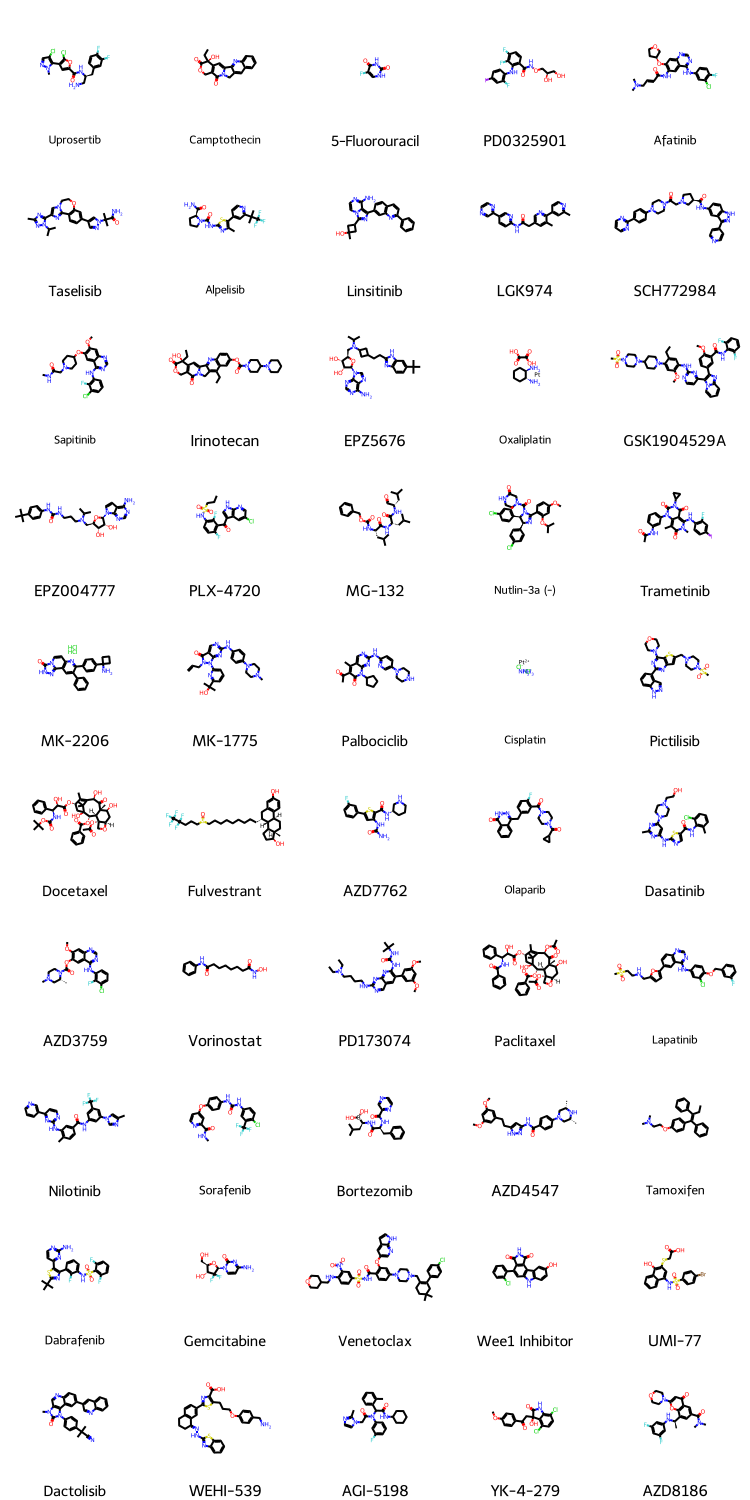

In [19]:
PandasTools.FrameToGridImage(top_50_drugs,column= 'ROMol', molsPerRow=5,subImgSize=(150,150),legendsCol='ID1')

In [20]:
drugs = drugs.sort_values(by='Mean_Y', ascending=False)
drugs.head(30)

ID1  \
118              Temozolomide   
38                    EPZ5676   
107                  SB216763   
72                     MIRA-1   
95                       PFI3   
28           Cyclophosphamide   
37                  EPZ004777   
67                  LY2109761   
102           Picolinici-acid   
66                     LJI308   
23                   CZC24832   
69                Leflunomide   
48                GSK2578215A   
45                    GDC0810   
20                  BIBR-1532   
64                     LCL161   
4                     AMG-319   
106               Ruxolitinib   
77                      MN-64   
0              5-Fluorouracil   
63                   KU-55933   
2                    AGI-5198   
97                 PRIMA-1MET   
76                      ML323   
52                     GSK591   
83              Nutlin-3a (-)   
90                     P22077   
91                  PCI-34051   
36                Doramapimod   
62   KRAS (G12C) Inhibitor-12   

                                                    X1  Count    Mean_Y  \
118                      CN1C(=O)N2C=NC(=C2N=N1)C(=O)N    747  5.923005   
38   CC(C)N(C[C@@H]1[C@H]([C@H]([C@@H](O1)N2C=NC3=C...    798  5.569774   
107  CN1C=C(C2=CC=CC=C21)C3=C(C(=O)NC3=O)C4=C(C=C(C...     93  5.440685   
72                             CCC(=O)OCN1C(=O)C=CC1=O    748  5.340544   
95   C1[C@@H]2CN([C@H]1CN2C3=CC=CC=N3)/C=C/C(=O)C4=...    726  5.255539   
28                           C1CNP(=O)(OC1)N(CCCl)CCCl    748  5.190782   
37   CC(C)N(CCCNC(=O)NC1=CC=C(C=C1)C(C)(C)C)C[C@@H]...    798  5.168745   
67   C1CC2=C(C(=NN2C1)C3=CC=CC=N3)C4=C5C=CC(=CC5=NC...    726  5.142520   
102                                C1=CC=NC(=C1)C(=O)O    726  5.139155   
66   C1COCCN1C2=CC=C(C=C2)C3=C(C=NC=C3)C4=CC(=C(C(=...    743  5.092107   
23   CC(C)(C)NS(=O)(=O)C1=CN=CC(=C1)C2=CN3C(=NC(=N3...    726  5.041585   
69             CC1=C(C=NO1)C(=O)NC2=CC=C(C=C2)C(F)(F)F    726  4.982836   
48   C1=CC=C(C=C1)COC2=C(C=C(C=C2)C3=CC(=NC=C3)F)C(...    749  4.928608   
45   CC/C(=C(/C1=CC=C(C=C1)/C=C/C(=O)O)\C2=CC3=C(C=...    749  4.917683   
20   C/C(=C\C(=O)NC1=CC=CC=C1C(=O)O)/C2=CC3=CC=CC=C...    746  4.898342   
64   C[C@@H](C(=O)N[C@@H](C1CCCCC1)C(=O)N2CCC[C@H]2...    725  4.857688   
4    C[C@@H](C1=C(N=C2C=C(C=CC2=C1)F)C3=CC=CC=N3)NC...    744  4.799954   
106  C1CCC(C1)[C@@H](CC#N)N2C=C(C=N2)C3=C4C=CNC4=NC=N3    726  4.743176   
77            CC(C)C1=CC=C(C=C1)C2=CC(=O)C3=CC=CC=C3O2    726  4.726800   
0                                 C1=C(C(=O)NC(=O)N1)F    802  4.703523   
63   C1COCCN1C2=CC(=O)C=C(O2)C3=C4C(=CC=C3)SC5=CC=C...     48  4.685111   
2    CC1=CC=CC=C1C(C(=O)NC2CCCCC2)N(C3=CC(=CC=C3)F)...    749  4.673811   
97                             COCC1(C(=O)C2CCN1CC2)CO    726  4.595880   
76   CC1=CN=C(N=C1NCC2=CC=C(C=C2)N3C=CN=N3)C4=CC=CC...    726  4.530825   
52   C1CC(C1)NC2=NC=CC(=C2)C(=O)NC[C@@H](CN3CCC4=CC...    742  4.519871   
83   CC(C)OC1=C(C=CC(=C1)OC)C2=N[C@H]([C@H](N2C(=O)...    769  4.468336   
90   CC(=O)C1=CC(=C(S1)SC2=C(C=C(C=C2)F)F)[N+](=O)[O-]    749  4.454863   
91          COC1=CC=C(C=C1)CN2C=CC3=C2C=C(C=C3)C(=O)NO    726  4.451195   
36   CC1=CC=C(C=C1)N2C(=CC(=N2)C(C)(C)C)NC(=O)NC3=C...     46  4.433067   
62        C=CC(=O)N1CCN(CC1)C(=O)CNC2=CC(=C(C=C2O)Cl)I    726  4.419336   

                                                ROMol  
118  <rdkit.Chem.rdchem.Mol object at 0x7f90584d5b60>  
38   <rdkit.Chem.rdchem.Mol object at 0x7f90584d4040>  
107  <rdkit.Chem.rdchem.Mol object at 0x7f90584d7060>  
72   <rdkit.Chem.rdchem.Mol object at 0x7f90584d5930>  
95   <rdkit.Chem.rdchem.Mol object at 0x7f90584d6420>  
28   <rdkit.Chem.rdchem.Mol object at 0x7f90584d5850>  
37   <rdkit.Chem.rdchem.Mol object at 0x7f90584d4190>  
67   <rdkit.Chem.rdchem.Mol object at 0x7f90584d6500>  
102  <rdkit.Chem.rdchem.Mol object at 0x7f90584d6ab0>  
66   <rdkit.Chem.rdchem.Mol object at 0x7f90584d5e70>  
23   <rdkit.Chem.rdchem.Mol object at 0x7f90584d6a40>  
69  

## Cell lines

In [21]:
cell_lines = df.groupby('ID2').agg({'X2': 'first', 'ID2': 'count', 'Y': 'mean'}).rename(columns={'ID2': 'Count', 'Y': 'Mean_Y'}).reset_index()
cell_lines = cell_lines.sort_values(by='Count', ascending=False)

In [28]:
cell_lines.head(20)

ID2                                                 X2  Count  \
407  MDA-MB-436  [7.277258404667389, 2.7839011366957402, 10.716...    137   
154      EFM-19  [7.68927837323408, 2.9382786620466805, 10.9283...    137   
403  MDA-MB-231  [7.78398331989301, 2.8451233857777596, 10.0478...    137   
402  MDA-MB-157  [5.500208905976, 3.10477591586454, 10.91037141...    137   
406  MDA-MB-415  [6.391808704591889, 2.84384586598087, 10.27915...    137   
56       BT-549  [6.3831475304701195, 2.746627143786, 10.392288...    137   
408  MDA-MB-453  [3.3667148688751696, 2.9577763986717303, 9.484...    137   
241       HCC70  [8.431625443159241, 2.75464924712475, 9.317846...    137   
803    ZR-75-30  [7.119514681260529, 3.09901119848813, 9.690033...    137   
240       HCC38  [7.45295424757166, 2.8849173944300897, 10.1733...    137   
79       CAMA-1  [6.90040710684829, 2.72616293009199, 9.5782068...    137   
748        T47D  [7.34299641815662, 2.81953519155425, 10.786582...    136   
78     CAL-85-1  [9.56816729361698, 2.71459090638035, 10.124494...    136   
420     MFM-223  [3.2576143704016203, 2.67984168824136, 10.8036...    136   
73       CAL-51  [8.71233752103624, 2.6435077554121, 9.88073281...    136   
409  MDA-MB-468  [8.68080042600767, 3.06767281982391, 10.843286...    136   
176      EVSA-T  [7.41110593233514, 3.09611842627478, 10.058010...    136   
226     HCC1187  [9.013252540641961, 2.9520929896608, 9.3474286...    136   
307      JIMT-1  [8.44162845293353, 2.6392762542455497, 11.4637...    136   
225     HCC1143  [7.58193774904993, 2.81430257671695, 10.363326...    136   

       Mean_Y  
407  3.764649  
154  2.870660  
403  2.535354  
402  3.135371  
406  2.437257  
56   3.117789  
408  2.104124  
241  2.536662  
803  4.669582  
240  3.563461  
79   2.577375  
748  2.885061  
78   2.950383  
420  3.454316  
73   2.314998  
409  1.974885  
176  1.715417  
226  3.244209  
307  3.182196  
225  3.315005

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/giovannigiofre/opt/anaconda3/envs/dados/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/giovannigiofre/opt/anaconda3/envs/dados/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/giovannigiofre/opt/anaconda3/envs/dados/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


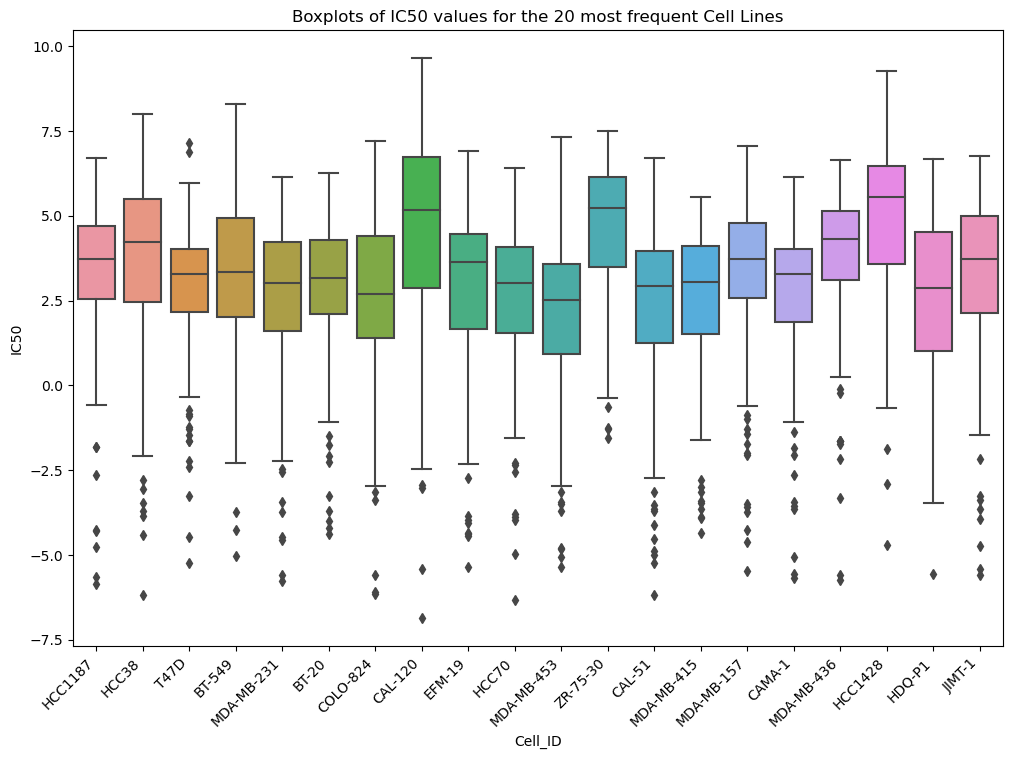

In [29]:
# Get the 20 most frequent ID2 values
top_20_id2 = df['ID2'].value_counts().nlargest(20).index

# Filter the DataFrame for the top 20 ID2 values
df_top_20 = df[df['ID2'].isin(top_20_id2)]

# Create boxplot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='ID2', y='Y', data=df_top_20)
plt.title('Boxplots of IC50 values for the 20 most frequent Cell Lines')
plt.xlabel('Cell_ID')
plt.ylabel('IC50')
plt.xticks(rotation=45, ha='right')  
plt.show()